In [2]:
import csv
import time
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Function to save data to CSV file
def save_to_csv(data):
    file_name = 'Verify-sy-bs02.csv'
    if not os.path.exists(file_name):
        with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)

    with open(file_name, 'a', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        for row in data:
            writer.writerow(row)

# Function to write log messages to a file
def write_log(message):
    log_file = 'logs.txt'
    with open(log_file, 'a', encoding='utf-8') as file:
        file.write(message + '\n')

# Function to get article content and date from URL
def get_article_info(article_url):
    try:
        response = requests.get(article_url)
        response.raise_for_status()  # Raise an error for bad response status codes
        soup = BeautifulSoup(response.text, 'html.parser')

        article_content = ''
        for paragraph in soup.find_all('p'):
            article_content += paragraph.text.strip() + '\n'

        article_date = soup.find('p', class_='dat-det-mob').find('span').text.strip()

        return article_content, article_date

    except Exception as e:
        print(f"An error occurred while scraping {article_url}: {e}")
        return None, None

# List of URLs to scrape along with their corresponding category names
urls_categories = [
    ('https://verify-sy.com/all/18?page=1', 'كذب'),
    ('https://verify-sy.com/all/53?page=1', 'تضليل'),
    ('https://verify-sy.com/all/54?page=1', 'نظرية-المؤامرة'),
    ('https://verify-sy.com/all/55?page=1', 'كذب-باسم-العلم'),
    ('https://verify-sy.com/all/56?page=1', 'خطأ'),
    ('https://verify-sy.com/all/57?page=1', 'انحياز'),
    ('https://verify-sy.com/all/58?page=1', 'تلاعب-بالحقائق'),
    ('https://verify-sy.com/all/59?page=1', 'عنوان-مضلل'),
    ('https://verify-sy.com/all/60?page=1', 'سخرية'),
    ('https://verify-sy.com/all/61?page=1', 'خارج-السياق'),
    ('https://verify-sy.com/all/62?page=1', 'غير-مؤكد'),
    ('https://verify-sy.com/all/165?page=1', 'مؤكد'),
]

# Initialize the WebDriver
driver = webdriver.Chrome()

try:
    for url, category_name in urls_categories:
        page_number = 1  # Initialize the page number
        
        while True:
            # Generate the URL with the current page number
            page_url = f"{url}&page={page_number}"
            
            # Open the webpage
            driver.get(page_url)
            time.sleep(2)  # Give some time for the page to load
            
            print("Processing page:", page_url)
            
            # Find and extract the news articles for the current category
            news_articles = driver.find_elements(By.CSS_SELECTOR, 'div.blog_post_style2')
            print("Number of articles found on this page:", len(news_articles))

            # Output the articles for the current category
            data = []
            for article in news_articles:
                title = article.find_element(By.CSS_SELECTOR, 'h3.list-title-ca').text
                article_url = article.find_element(By.CSS_SELECTOR, 'a').get_attribute('href')

                # Get article content and date from URL
                article_content, article_date = get_article_info(article_url)

                if article_content is not None and article_date is not None:
                    # Set the label to 'fake' by default
                    label = 'fake'
                    # For the URL 'https://verify-sy.com/all/165', set the label to 'real'
                    if url == 'https://verify-sy.com/all/165':
                        label = 'real'

                    # Append data to the list
                    data.append([title, label, category_name, article_content, article_date])

                # Check if we have processed 18 articles, then break the loop
                if len(data) >= 18:
                    break

            # Save the data to CSV file
            save_to_csv(data)

            # Check if there are no more news articles on the page
            if len(news_articles) == 0:
                break

            # Increment the page number for the next iteration
            page_number += 1

except Exception as e:
    print("An error occurred:", e)

finally:
    # Close the WebDriver
    driver.quit()

Processing page: https://verify-sy.com/all/18?page=1&page=1
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=2
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=3
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=4
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=5
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=6
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=7
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=8
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=9
Number of articles found on this page: 18
Processing page: https://verify-sy.com/all/18?page=1&page=10
Number of articles fo

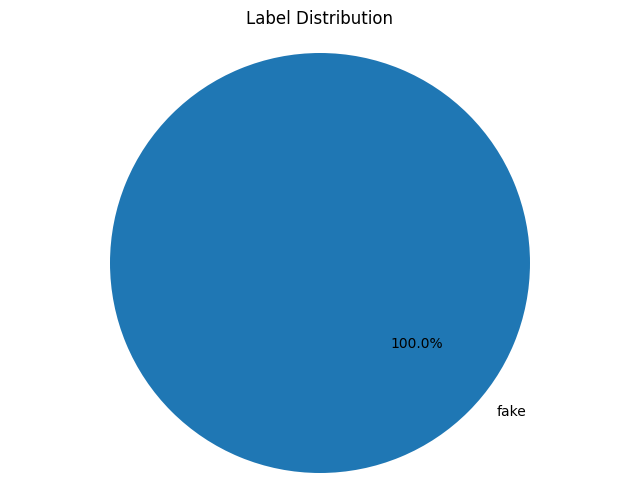

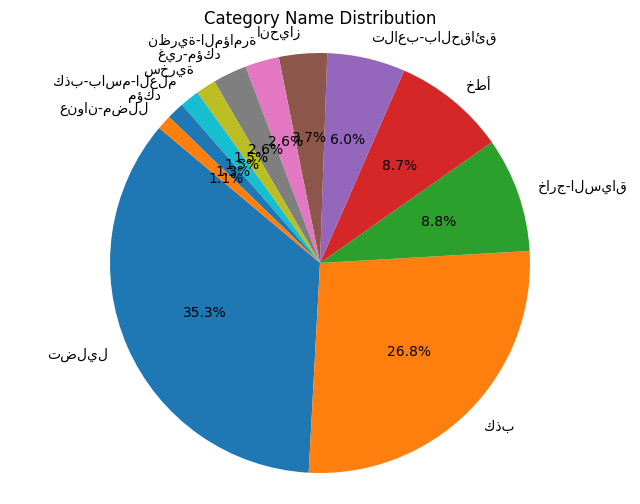

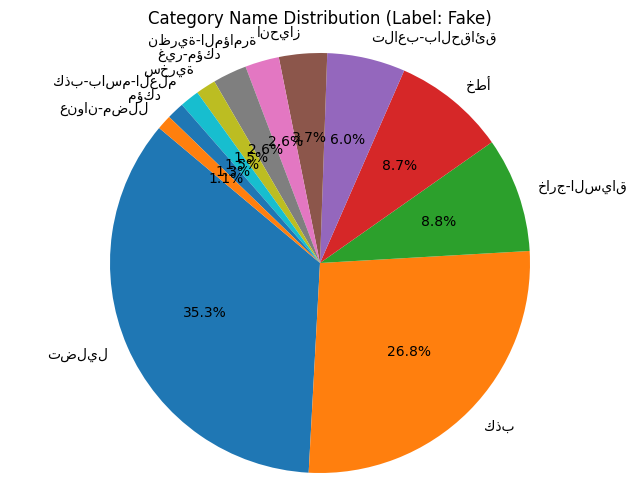

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the new column names
new_column_names = ['title', 'label', 'category_name', 'article_content', 'article_date']

# Load the CSV file and redefine the column names
df = pd.read_csv('Verify-sy-bs02.csv', names=new_column_names)

# Clean duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned CSV file
df.to_csv('verify-sy-bs-RAW-data.csv', index=False)

# Pie chart for label distribution
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')
plt.show()

# Pie chart for category name distribution
category_counts = df['category_name'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Name Distribution')
plt.axis('equal')
plt.show()

# Filter the DataFrame where label is 'fake'
fake_df = df[df['label'] == 'fake']
fake_category_counts = fake_df['category_name'].value_counts()

# Pie chart for category name distribution where label = 'fake'
plt.figure(figsize=(8, 6))
plt.pie(fake_category_counts, labels=fake_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Name Distribution (Label: Fake)')
plt.axis('equal')

plt.show()

In [4]:
# Load the CSV file and redefine the column names
df = pd.read_csv('verify-sy-bs-RAW-data.csv', names=new_column_names)

# Display the head of the cleaned data
print("Head of the cleaned data:")
print(df.head())

# Display the shape of the cleaned data
print("\nShape of the cleaned data:", df.shape)

Head of the cleaned data:
                                               title  label  category_name  \
0                                              title  label  category_name   
1  هل توصلت إسرائيل إلى اتفاق لتطبيع العلاقات مع ...   fake            كذب   
2                                                NaN   fake            كذب   
3                                                NaN   fake            كذب   
4                                                NaN   fake            كذب   

                                     article_content            article_date  
0                                    article_content            article_date  
1  \n\nنشرت حسابات بمواقع التواصل الاجتماعي، خبرا...     السبت 13 نيسان 2024  
2  \n\nادعت مواقع وحسابات على منصات التواصل الاجت...  الثلاثاء 02 نيسان 2024  
3  \n\nادعت حسابات على منصات التواصل الاجتماعي أن...   الاثنين 01 نيسان 2024  
4  \n\nادعت شبكات إخبارية وحسابات على منصات التوا...   الأربعاء 20 آذار 2024  

Shape of the cleaned data: (19

In [5]:
from transformers import pipeline
from tqdm import tqdm

# Load the CSV file into a DataFrame with specified column names
df = pd.read_csv('verify-sy-bs-RAW-data.csv', names=['title', 'label', 'category_name', 'article_content', 'article_date'])
df.head()
print("Shape of the DataFrame :", df.shape)
# Remove rows with empty article_content
df = df[df['article_content'].notna() & (df['article_content'] != '')]
#df = df.dropna(subset=['article_content'])
print("Shape of the DataFrame after dropping NANS:", df.shape)
# Initialize the topic classification pipeline
topic_pipe = pipeline("text-classification", model="Ammar-alhaj-ali/arabic-MARBERT-news-article-classification")

# Function to classify the text into one of the predefined topics
def classify_topic(text):
    # Split the text into smaller chunks
    max_chunk_length = 512  # Maximum sequence length supported by the model
    chunks = [text[:max_chunk_length]]

    # Calculate the estimated time
    num_chunks = len(chunks)
    estimated_time_per_chunk = 2  # Estimated time per chunk in seconds
    total_estimated_time = num_chunks * estimated_time_per_chunk

    # Show message indicating topic prediction is in progress
    print("Predicting topics... (Estimated time: {:.2f} seconds)".format(total_estimated_time))

    # Initialize a progress bar
    with tqdm(total=num_chunks, desc="Prediction Progress") as pbar:
        # Classify the first chunk
        prediction = topic_pipe(chunks[0])

        # Update the progress bar
        pbar.update(1)

    # Get the predicted topic
    predicted_topic = prediction[0]['label']
    return predicted_topic

# Add a new column "TOPIC" to the DataFrame and populate it with topics predicted from the article content
df['TOPIC'] = df['article_content'].apply(classify_topic)

# Save the DataFrame with the new column back to a CSV file with the same column names
df.to_csv('verify-sy-bs-data-with-topics.csv', index=False, header=['title', 'label', 'category_name', 'article_content', 'article_date','TOPIC'])



Shape of the DataFrame : (1947, 5)
Shape of the DataFrame after dropping NANS: (1947, 5)
Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


Predicting topics... (Estimated time: 2.00 seconds)


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


In [7]:
# Load the CSV file and redefine the column names
df = pd.read_csv('verify-sy-bs-data-with-topics.csv')

# Display the shape of the cleaned data
print("\nShape of the cleaned data:", df.shape)



Shape of the cleaned data: (1947, 6)
